<a href="https://colab.research.google.com/github/benvekedim/machine-learning-101/blob/main/regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_csv('https://bilkav.com/satislar.csv')
#pd.read_csv("veriler.csv")
#test
print(veriler)
#veri on isleme


    Aylar  Satislar
0       8   19671.5
1      10   23102.5
2      11   18865.5
3      13   21762.5
4      14   19945.5
5      19   28321.0
6      19   30075.0
7      20   27222.5
8      20   32222.5
9      24   28594.5
10     25   31609.0
11     25   27897.0
12     25   28478.5
13     26   28540.5
14     29   30555.5
15     31   33969.0
16     32   33014.5
17     34   41544.0
18     37   40681.5
19     37    4697.0
20     42   45869.0
21     44   49136.5
22     49   50651.0
23     50   56906.0
24     54   54715.5
25     55   52791.0
26     59   58484.5
27     59   56317.5
28     64   61195.5
29     65   60936.0


In [2]:
aylar = veriler[['Aylar']]
print(aylar)

    Aylar
0       8
1      10
2      11
3      13
4      14
5      19
6      19
7      20
8      20
9      24
10     25
11     25
12     25
13     26
14     29
15     31
16     32
17     34
18     37
19     37
20     42
21     44
22     49
23     50
24     54
25     55
26     59
27     59
28     64
29     65


In [3]:
satislar = veriler[['Satislar']]
print(satislar)

    Satislar
0    19671.5
1    23102.5
2    18865.5
3    21762.5
4    19945.5
5    28321.0
6    30075.0
7    27222.5
8    32222.5
9    28594.5
10   31609.0
11   27897.0
12   28478.5
13   28540.5
14   30555.5
15   33969.0
16   33014.5
17   41544.0
18   40681.5
19    4697.0
20   45869.0
21   49136.5
22   50651.0
23   56906.0
24   54715.5
25   52791.0
26   58484.5
27   56317.5
28   61195.5
29   60936.0


In [4]:
satislar2 = veriler.iloc[:,:1].values
print(satislar2)

[[ 8]
 [10]
 [11]
 [13]
 [14]
 [19]
 [19]
 [20]
 [20]
 [24]
 [25]
 [25]
 [25]
 [26]
 [29]
 [31]
 [32]
 [34]
 [37]
 [37]
 [42]
 [44]
 [49]
 [50]
 [54]
 [55]
 [59]
 [59]
 [64]
 [65]]


In [5]:
#verilerin egitim ve test için bolunmesi

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(aylar,satislar,test_size=0.33,random_state=0)


In [6]:
#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

In [7]:
#Eksik , hatalı, geçmiş veriler için tahmin kullanılır
#Sayısal veriler tahmin edilir
#Tahmin = prediction
#Öngörü = Forecasting
#Zamana bağlı tahmin yapılıyorsa zaman serisi analizi diye geçiyor


In [8]:
#model inşası (linear regression)

#standardize veri için

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

tahmin = lr.predict(X_test)
tahmin

array([[-1.33324088],
       [ 1.05398097],
       [-0.65761206],
       [-0.70265398],
       [ 0.82877136],
       [ 0.60356175],
       [ 0.82877136],
       [-0.70265398],
       [-0.29727668],
       [ 0.37835214]])

In [9]:
#standardize edilmemiş
lr = LinearRegression()
lr.fit(x_train,y_train)

tahmin = lr.predict(x_test)
tahmin


array([[20126.21865404],
       [57740.29412655],
       [30771.7117123 ],
       [30062.01217508],
       [54191.79644047],
       [50643.29875438],
       [54191.79644047],
       [30062.01217508],
       [36449.30801003],
       [47094.80106829]])

Text(0, 0.5, 'Satışlar')

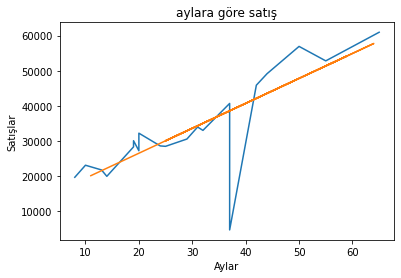

In [11]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()

plt.plot(x_train,y_train)
plt.plot(x_test,lr.predict(x_test))

plt.title("aylara göre satış")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")
